Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [127]:
from pandas import read_csv, to_datetime, to_timedelta, DataFrame, crosstab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency #norm 
#github copilot code completer

In [128]:
cmt = read_csv('Comcast_telecom_complaints_data.csv',
               skiprows=[1035],
               dtype={'Ticket#':'Int64','Zip_code':'Int64'},
                parse_dates=['Date','Date_month_year','Time'],
                infer_datetime_format=True,
                )#dtype={'Ticket#':'Int64','Zip_code':'Int64'}, cmt.iloc[1034,]

In [129]:
cmt[['Date','Date_month_year','Time']].dtypes

Date               datetime64[ns]
Date_month_year    datetime64[ns]
Time               datetime64[ns]
dtype: object

In [130]:
cmt['day'] = cmt['Date'].dt.day
cmt['month'] = cmt['Date_month_year'].dt.month

<AxesSubplot:title={'center':'Daily Complaints'}, xlabel='Date', ylabel='#_of_Complaints'>

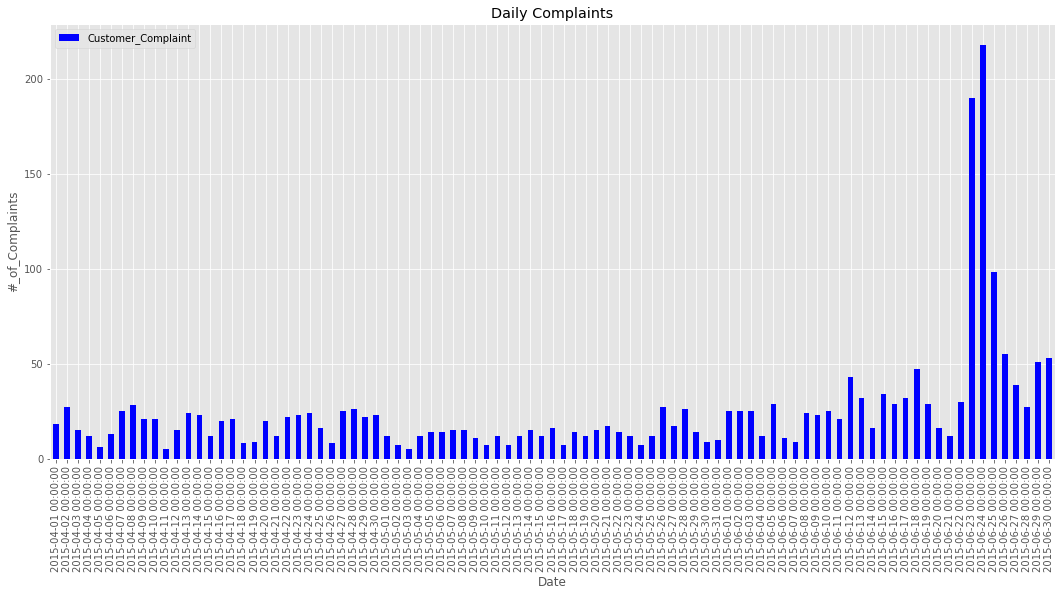

In [131]:
cmt[['Date','Customer_Complaint']].groupby(['Date']).count().plot(kind='bar',color='b',ylabel='#_of_Complaints', 
                                                                title='Daily Complaints', figsize=(18,8))

<AxesSubplot:title={'center':'Daily Complaints'}, xlabel='day', ylabel='#_of_Complaints'>

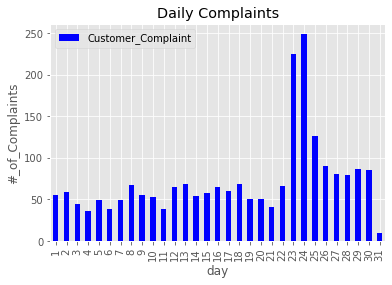

In [132]:
cmt[['day','Customer_Complaint']].groupby(['day']).count().plot(kind='bar',color='b',ylabel='#_of_Complaints', 
                                                                title='Daily Complaints')

<AxesSubplot:title={'center':'Monthly Complaints'}, xlabel='month', ylabel='#_of_Complaints'>

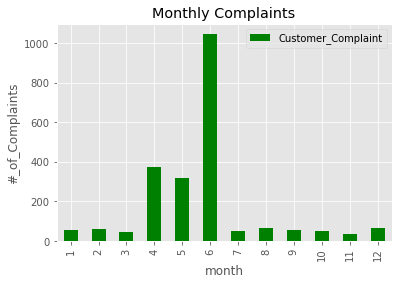

In [133]:
cmt[['month','Customer_Complaint']].groupby(['month']).count().plot(kind='bar',color='g',ylabel='#_of_Complaints', 
                                                                    title='Monthly Complaints')

In [134]:
cmt.columns

Index(['Ticket#', 'Customer_Complaint', 'Date', 'Date_month_year', 'Time',
       'Received_Via', 'City', 'State', 'Zip_code', 'Status',
       'Filing_on_Behalf_of_Someone', 'day', 'month'],
      dtype='object')

In [135]:
cmt['Customer_Complaint'].value_counts()

Comcast                                  83
Comcast Internet                         18
Comcast Data Cap                         17
comcast                                  13
Comcast Billing                          11
                                         ..
Deceptive trade                           1
intermittent internet                     1
Internet Speed on Wireless Connection     1
Internet speed deteriation                1
Comcast, Ypsilanti MI Internet Speed      1
Name: Customer_Complaint, Length: 1840, dtype: int64

In [136]:
cmt.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [137]:
def decision(inpu):
    dec = {'Closed':'Closed', 'Open':'Open', 'Solved':'Closed', 'Pending':'Open'}
    return dec[inpu]
cmt['Q3'] = cmt.Status.apply(decision)
cmt.State.replace(['District of Columbia'],['District Of Columbia'], inplace=True)

In [138]:
Open=cmt[['State','Q3']][cmt['Q3']=='Open'].groupby(['State'])['Q3'].count()
Closed=cmt[['State','Q3']][cmt['Q3']=='Closed'].groupby(['State'])['Q3'].count()
#sns.barplot(data=Open, x=Open.index, y=Open.values, hue=Closed.values)

In [139]:
len(Open), len(Closed)

(34, 42)

In [140]:
#np.concatenate(np.array(), np.setdiff1d(Closed.index, Open.index) )
#np.sort(np.array(Open.index.tolist() + np.setdiff1d(Closed.index, Open.index).tolist(), dtype=str))
indexes = np.sort(cmt.State.unique())
indexes

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia', 'Florida',
       'Georgia', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia'], dtype=object)

In [145]:
#np.setdiff1d(Closed.index, Open.index), type(np.setdiff1d(Closed.index, Open.index))
#Closed.index

In [142]:
OpenVals = np.zeros(len(indexes), dtype='int64')
OpenVals[[np.where(indexes==req)[0][0] for req in Open.index]] = Open.values
OpenVals

array([ 9,  6,  0, 61, 22,  3,  4,  2, 39, 80, 29,  9,  0,  1,  3,  1,  2,
       15, 11, 23,  4, 16,  1,  0,  0,  4, 19,  4,  0,  0,  0, 13, 20,  0,
        3, 47, 22,  6,  1, 11, 23,  3], dtype=int64)

<AxesSubplot:title={'center':'State wise stalked Complaint Status'}, xlabel='State', ylabel='Number of Complaints'>

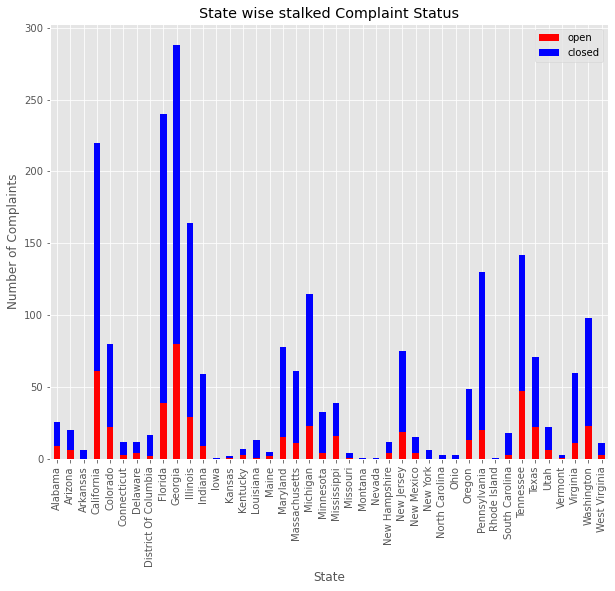

In [172]:
df = DataFrame({'open':OpenVals, 'closed':Closed.values}, index=indexes)
df.plot(kind='bar', stacked=True, color=['r','b'], figsize=(10,8), 
        title='State wise stalked Complaint Status', xlabel ='State',
       ylabel='Number of Complaints')

## Georgia state has got the highest number of complaints
## Kansa state has the highest percentage of unresolved complaints

In [159]:
df['unresolved%']=(100*OpenVals/(OpenVals+Closed.values)).round(3)
df[df['unresolved%'] > 29]

,open,closed,unresolved%
Alabama,9,17,34.615
Arizona,6,14,30.000
Delaware,4,8,33.333
Kansas,1,1,50.000
Kentucky,3,4,42.857
Maine,2,3,40.000
Mississippi,16,23,41.026
New Hampshire,4,8,33.333
Tennessee,47,95,33.099
Texas,22,49,30.986


## percentage of complaints resolved till date, which were received through :
* ### Internet
* ### customer care calls

In [173]:
recVia = cmt[['Received_Via','Q3']][cmt.Q3 == 'Closed'].groupby(['Received_Via'])['Received_Via'].value_counts()
(100*recVia/recVia.values.sum()).round(3)

Received_Via        Received_Via      
Customer Care Call  Customer Care Call    50.586
Internet            Internet              49.414
Name: Received_Via, dtype: float64

In [164]:
cmt[['Received_Via','Status']][cmt.Status == 'Closed'].groupby(['Received_Via'])['Received_Via'].value_counts()

Received_Via        Received_Via      
Customer Care Call  Customer Care Call    386
Internet            Internet              347
Name: Received_Via, dtype: int64